# Support Vector Machines

## 1 Support vector machines - examples

### 1.1 Example dataset 1

In this example, 2D data should be separated by a linear boundary. Because of a single positive outlier at about (0.1, 4.1), regularization parameter C will drasticly affect the position of the linear boundary.

Informally, the C parameter is a positive value that controls the penalty for misclassified training examples; a large C parameter tells the SVM to try to classify **all** the examples correctly. It plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter for regularized logistic regression.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')
%matplotlib inline
from sklearn.svm import SVC
from scipy.io import loadmat

In [2]:
dataset1 = loadmat('data/ex6data1.mat')
print(dataset1['__header__'])
X = dataset1['X']
y = dataset1['y']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011'


In [3]:
def plotData(X, y):
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    plt.plot(X[pos, 0], X[pos, 1], 
             marker='+',
             color='black',
             markersize=7,
             linestyle='None',
             label='pos examps')

    plt.plot(X[neg, 0], X[neg, 1], 
             marker='o',
             color='red',
             markersize=7,
             linestyle='None',
             label='neg examps')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    
def trainSVM(X, y, C, kernel, tol, max_iter):
    return SVC(C, kernel=kernel, tol=tol, max_iter=max_iter)

def visualizeBoundary(X, y, model):
    # make classification predictions over a grid of values
    x1plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
    x2plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num=100)
    preds = np.zeros((len(x1plot), len(x2plot)))
    for i, x1 in enumerate(x1plot):
        for j, x2 in enumerate(x2plot):
            preds[i,j] = model.predict(np.array([x1, x2]).reshape(1, -1))
    
    #X1, X2 = np.meshgrid(x1plot, x2plot)
    contr = plt.contour(x1plot, x2plot, preds.T)

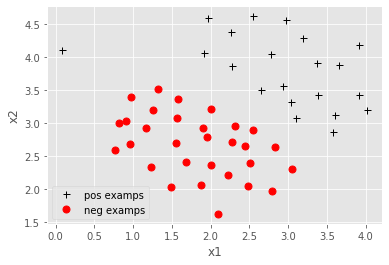

In [4]:
plotData(X, y)
plt.legend(loc='lower left')
plt.show()

#### C = 1

In [5]:
# train a model
C = 1
kernel = 'linear'
tol = 1e-3
max_iter=1000
model = trainSVM(X, y, C, kernel, tol, max_iter)
model.fit(X, y.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

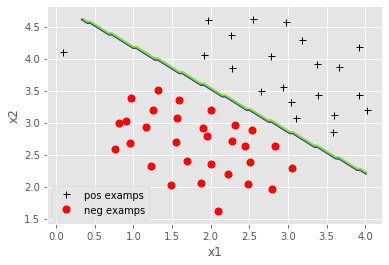

In [6]:
# plot the SVM boundary
plotData(X, y)
visualizeBoundary(X, y, model)
plt.axis([np.min(X[:, 0])-0.2, np.max(X[:, 0])+0.2,
         np.min(X[:, 1])-0.2, np.max(X[:, 1])+0.2])
plt.legend(loc='lower left')
plt.show()

#### Changing the C parameter

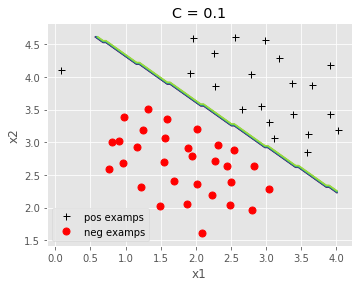

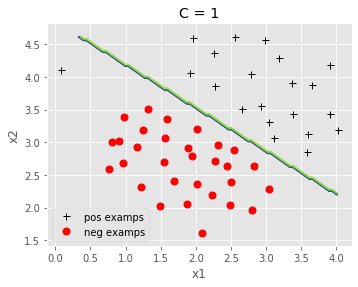

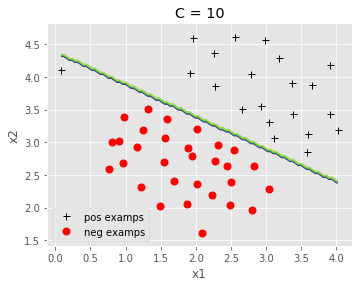

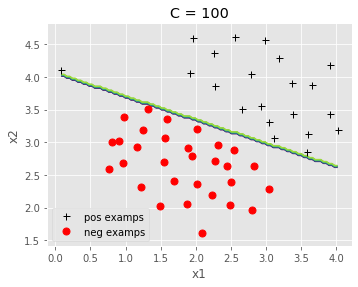

In [7]:
Cs = [0.1, 1, 10, 100]
for i, C in enumerate(Cs):
    kernel = 'linear'
    tol = 1e-2
    max_iter=1000
    model = trainSVM(X, y, C, kernel, tol, max_iter)
    model.fit(X, y.ravel())
    
    plt.figure(figsize=(12,9))
    plt.subplot(2,2,i+1)
    plotData(X, y)
    plt.axis([np.min(X[:, 0])-0.2, np.max(X[:, 0])+0.2,
             np.min(X[:, 1])-0.2, np.max(X[:, 1])+0.2])
    visualizeBoundary(X, y, model)
    plt.title(f'C = {C}')
    plt.legend(loc='lower left')
    plt.show()

### 1.2 SVM for non-linearly separable data

#### 1.2.1 Gaussian kernel

To find non-linear decision boundaries with the SVM, input features have to be mapped to higher dimension (in order to separate the data linearly with a hyperplane). 

The most used mapping function is Gaussian kernel or radial basis function. Gaussian kernel is similarity function that measures the 'distance' between a pair of examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel is parametrized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metrics decreases to 0 as the examples are further apart. 
$$
K_{gasussian}(x^{(i)}, x^{(j)}) = exp(-\frac{||{x^{(i)} - x^{(j)}||}^2}{2\sigma^{2}} = exp\bigg(-\frac{\sum_{k=1}^{n}(x_{k}^{(i)} - x_{k}^{(j)})^2)}{2\sigma^2}\bigg)
$$

In [8]:
def gaussianKernel(x1, x2, sigma):
    x1 = x1.flatten()
    x2 = x2.flatten()
    
    return np.exp(-np.sum((x1-x2)**2)/(2*sigma**2))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

In [10]:
print(f'Gaussian kernel between x1={x1} and x2={x2} with sigma={sigma} is {sim}')
print(f'Expected value ~ 0.324652')

Gaussian kernel between x1=[1 2 1] and x2=[ 0  4 -1] with sigma=2 is 0.32465246735834974
Expected value ~ 0.324652


#### 1.2.2 Example dataset 2

This dataset contains data without linear decision boundary that separates the positive and negative examples.  

In [11]:
dataset2 = loadmat('data/ex6data2.mat')
print(dataset2['__header__'])
X = dataset2['X']
y = dataset2['y']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011'


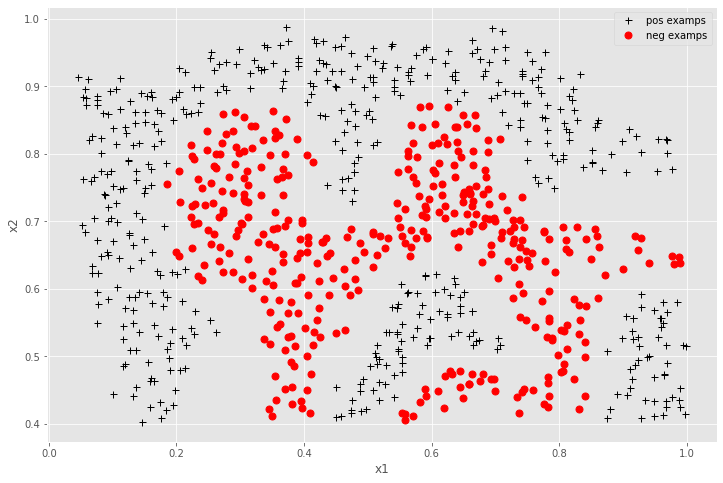

In [12]:
plt.figure(figsize=(12, 8))
plotData(X, y)
plt.legend(loc='best')
plt.show()

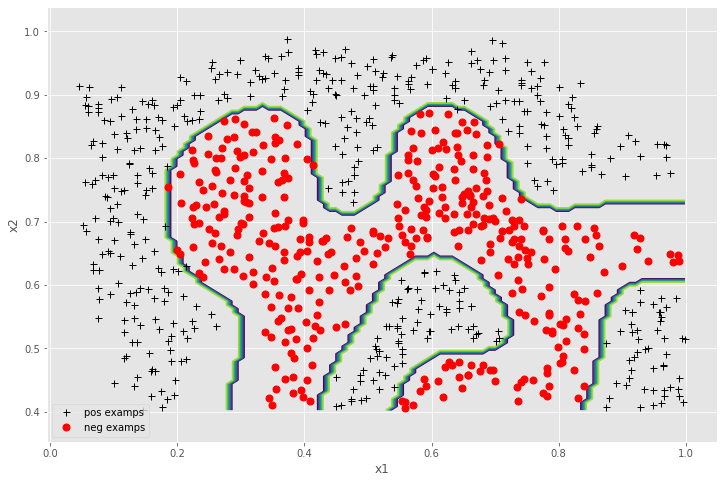

In [13]:
# rbf is ootb sklearn gaussian kernel
# instead of sigma it takes gamma=1/sigma^2 as parameter
C = 1
sigma = 0.1
model = SVC(C=C,
            kernel='rbf',
            gamma=sigma**(-2),
           )
model.fit(X, y.ravel())

plt.figure(figsize=(12, 8))
plotData(X, y)
plt.axis([np.min(X[:, 0])-0.05, np.max(X[:, 0])+0.05,
         np.min(X[:, 1])-0.05, np.max(X[:, 1])+0.05])
visualizeBoundary(X, y, model)
plt.legend(loc='lower left')
plt.show()

#### 1.2.2 Example dataset 2

In the provided dataset, *ex6data3.mat*, the given variables are $X$,
$y$, $Xval$, $yval$.
The task is to use the cross validation set to determine the best C and $\sigma$ parameter to use. 

For both C and $\sigma$, suggested values are 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30. All possible pairs of values for C and $\sigma$ should be examined, where the total number of models for suggested list is 64 (8^2). 

In [14]:
dataset3 = loadmat('data/ex6data3.mat')
print(dataset3['__header__'])
X = dataset3['X']
y = dataset3['y']
Xval = dataset3['Xval']
yval = dataset3['yval']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011'


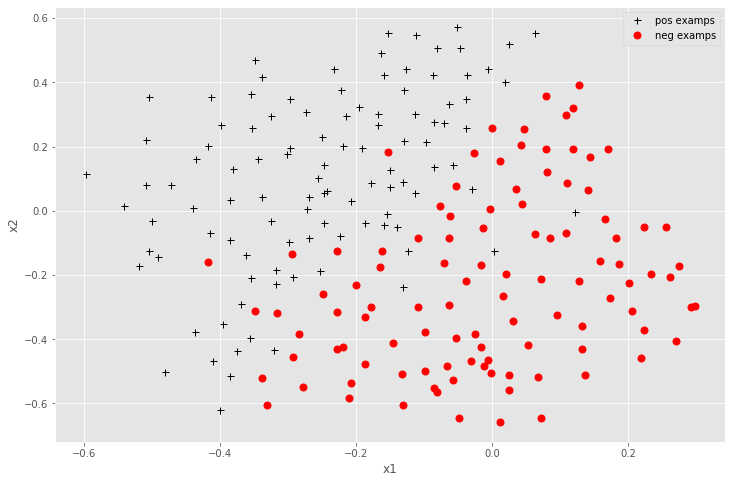

In [15]:
plt.figure(figsize=(12, 8))
plotData(X, y)
plt.legend(loc='best')
plt.show()

In [16]:
def cvParams(X, y, Xval, yval):
    params = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    opt_accuracy = 0
    opt_C, opt_sigma = 0, 0
    
    for i, C in enumerate(params):
        for j, sigma in enumerate(params):
            model = SVC(C, kernel='rbf', gamma=1/(sigma**2))
            model.fit(X, y.ravel())
            predictions = model.predict(Xval)
            accuracy = np.mean(predictions.ravel() == yval.ravel())
            if accuracy > opt_accuracy:
                opt_accuracy = accuracy
                opt_C = C
                opt_sigma = sigma
    return opt_C, opt_sigma, opt_accuracy

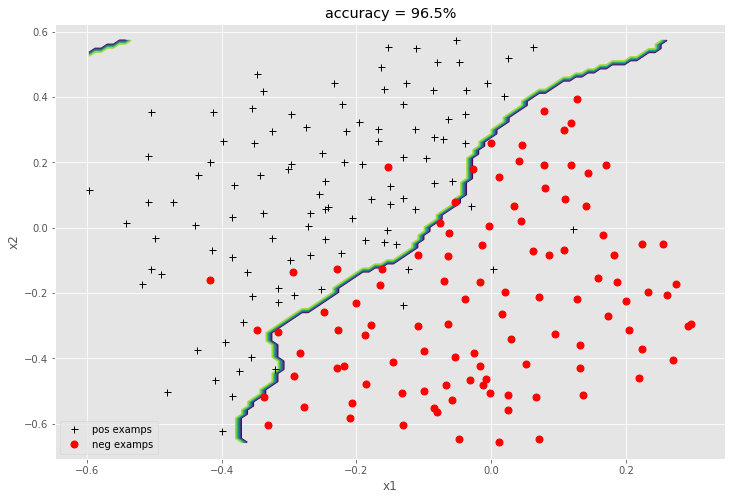

In [17]:
C, sigma, acc = cvParams(X, y, Xval, yval)
model = SVC(C, kernel='rbf', gamma=1/(sigma**2))
model.fit(X, y.ravel())

plt.figure(figsize=(12, 8))
plotData(X, y)
plt.axis([np.min(X[:, 0])-0.05, np.max(X[:, 0])+0.05,
         np.min(X[:, 1])-0.05, np.max(X[:, 1])+0.05])
visualizeBoundary(X, y, model)
plt.legend(loc='lower left')
plt.title(f'accuracy = {acc*100}%')
plt.show()

## 1 Spam classification